temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64
Mean Squared Error: 257589.0576940822
Mean Absolute Error: 391.79269568403123
R-squared: 0.7180084563489013


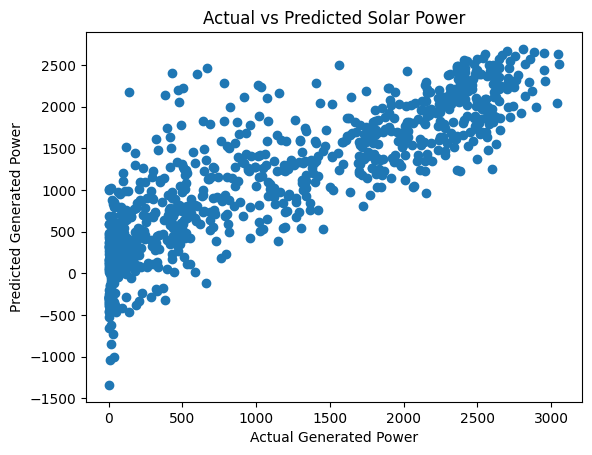

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv(r'C:\Users\ASUS\Downloads\03f4d1c1a55947025601.csv')

# Check for missing values
print(data.isnull().sum())

# Handle missing values (impute or drop)
data.fillna(data.mean(), inplace=True)

# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=['generated_power_kw']))

# Prepare the data
X = scaled_data
y = data['generated_power_kw']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model building
model = LinearRegression()
model.fit(X_train, y_train)

# Model predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Generated Power')
plt.ylabel('Predicted Generated Power')
plt.title('Actual vs Predicted Solar Power')
plt.show()
